In [ ]:
!pip install langchain_community

In [15]:
!pip install pypdf langchain_openai chromadb

  Using cached chromadb-0.5.13-py3-none-any.whl.metadata (6.8 kB)
  Using cached build-1.2.2.post1-py3-none-any.whl.metadata (6.5 kB)
  Using cached chroma_hnswlib-0.7.6.tar.gz (32 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached fastapi-0.115.0-py3-none-any.whl.metadata (27 kB)
  Using cached uvicorn-0.31.1-py3-none-any.whl.metadata (6.6 kB)
  Using cached posthog-3.7.0-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached onnxruntime-1.19.2-cp312-cp312-win_amd64.whl.metadata (4.7 kB)
  Using cached opentelemetry_api-1.27.0-py3-none-any.whl.metadata (1.4 kB)
  Using cached opentelemetry_exporter_otlp_proto_grpc-1.27.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached opentelemetry_instrumen

  error: subprocess-exited-with-error
  
  × Building wheel for chroma-hnswlib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [5 lines of output]
      running bdist_wheel
      running build
      running build_ext
      building 'hnswlib' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for chroma-hnswlib
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (chroma-hnswlib)


In [8]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ['OPENAI_API_KEY']=os.getenv("OPENAI_API_KEY")

In [4]:
from langchain_community.document_loaders import PyPDFLoader
loader=PyPDFLoader(r'./files/medical_treatment.pdf')
docs=loader.load()
docs[:5]

[Document(metadata={'source': './files/medical_treatment.pdf', 'page': 0}, page_content=''),
 Document(metadata={'source': './files/medical_treatment.pdf', 'page': 1}, page_content=''),
 Document(metadata={'source': './files/medical_treatment.pdf', 'page': 2}, page_content='2022CURRENT\nMedical \nDiagnosis\n& T reatmentS\nI X T Y - F I R S T  E D I T I O NEdited \nby\nMaxine A. Papadakis, MDProf\nessor of Medicine, Emeritus\nDepartment of Medicine\nUniversity of California, San FranciscoStephen \nJ. McPhee, MDProf\nessor of Medicine, Emeritus\nDivision of General Internal Medicine\nDepartment of Medicine\nUniversity of California, San FranciscoMichael \nW. Rabow, MDProf\nessor of Medicine and Urology\nDivision of Palliative Medicine\nDepartment of Medicine\nUniversity of California, San Francisco\nAssociate EditorKenneth \nR. McQuaid, MDProf\nessor of Medicine\nDepartment of Medicine\nUniversity of California, San Francisco\nWith Associate Authors\nNew York Chicago San Francisco Athens

In [6]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter=RecursiveCharacterTextSplitter(chunk_size=1000,chunk_overlap=200)
documents=text_splitter.split_documents(docs)
documents[:5]

[Document(metadata={'source': './files/medical_treatment.pdf', 'page': 2}, page_content='2022CURRENT\nMedical \nDiagnosis\n& T reatmentS\nI X T Y - F I R S T  E D I T I O NEdited \nby\nMaxine A. Papadakis, MDProf\nessor of Medicine, Emeritus\nDepartment of Medicine\nUniversity of California, San FranciscoStephen \nJ. McPhee, MDProf\nessor of Medicine, Emeritus\nDivision of General Internal Medicine\nDepartment of Medicine\nUniversity of California, San FranciscoMichael \nW. Rabow, MDProf\nessor of Medicine and Urology\nDivision of Palliative Medicine\nDepartment of Medicine\nUniversity of California, San Francisco\nAssociate EditorKenneth \nR. McQuaid, MDProf\nessor of Medicine\nDepartment of Medicine\nUniversity of California, San Francisco\nWith Associate Authors\nNew York Chicago San Francisco Athens London Madrid Mexico City\nMilan New Delhi Singapore Sydney Torontoa LANGE medical bookCMDT2022_FM_pi-xx.indd \n1 02/07/21 7:10 PM'),
 Document(metadata={'source': './files/medical_trea

In [11]:
from langchain_openai import OpenAIEmbeddings
from langchain_community.vectorstores import Chroma
db = Chroma.from_documents(documents,OpenAIEmbeddings())

ImportError: Could not import chromadb python package. Please install it with `pip install chromadb`.

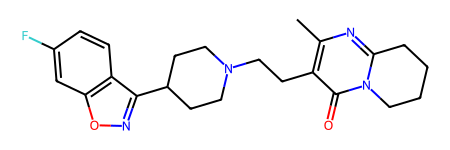

In [13]:
import rdkit.Chem as Chem
from rdkit.Chem import Draw

smiles = 'CC1=C(C(=O)N2CCCCC2=N1)CCN3CCC(CC3)C4=NOC5=C4C=CC(=C5)F'
Chem.MolFromSmiles(smiles)

In [14]:
from dockstring import load_target

target = load_target('DRD2')
score, aux = target.dock(smiles)

FileNotFoundError: [WinError 2] The system cannot find the file specified